In [1]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.1/241.1 kB 7.4 MB/s eta 0:00:00


In [2]:
import spotipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid ="6be0cfa5bd6948d7919736ec67014b10"
secret = "a0372b38afcc4fdda75d313e1bf7a736"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret= secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,10):
    track_results = sp.search(q='year:2022', type='track', limit=10,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

In [5]:
#import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Zach Bryan,Something in the Orange,3WMj8moIAXJhHsyLaqIIHI,89,40ZNYROS4zLfyyBSs2PGe2
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,95,06HL4z0CvFAxyc27GXpf02
2,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),2dHHgzDwk4BJdRwy9uXhTO,96,0iEtIxbK0KxaSlF7G42ZOp
3,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,94,7tYKF4w9nC0nq9CsPZTHyP
4,Natanael Cano,AMG,1lRtH4FszTrwwlK5gTSbXO,94,0elWFr7TW8piilVRYJUe4P


In [6]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [7]:
track_df = track_df.assign(artist_popularity=artist_popularity,
                           artist_genres=artist_genres,
                           artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Zach Bryan,Something in the Orange,3WMj8moIAXJhHsyLaqIIHI,89,40ZNYROS4zLfyyBSs2PGe2,83,"[classic oklahoma country, modern country pop]",1569727
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,95,06HL4z0CvFAxyc27GXpf02,100,[pop],77746916
2,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),2dHHgzDwk4BJdRwy9uXhTO,96,0iEtIxbK0KxaSlF7G42ZOp,91,[rap],4850009
3,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,94,7tYKF4w9nC0nq9CsPZTHyP,89,"[pop, r&b, rap]",13252257
4,Natanael Cano,AMG,1lRtH4FszTrwwlK5gTSbXO,94,0elWFr7TW8piilVRYJUe4P,86,"[corrido, corridos tumbados, musica mexicana, ...",7278823


In [8]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)
  #pd.concat([track_features,af])
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness',
                                'mode', 'speechiness', 'acousticness',
                                'instrumentalness', 'liveness', 'valence',
                                'tempo', 'type', 'id', 'uri', 'track_href',
                                'analysis_url', 'duration_ms', 'time_signature',
                                ])
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)

tf_df.head()

<ipython-input-8-7302d9c42741>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-8-7302d9c42741>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-8-7302d9c42741>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-8-7302d9c42741>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
<ipython-input-8-7302d9c42741>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.369,0.192,4,-12.151,0,0.0400,0.5550,0.000008,0.0954,0.148,175.212,audio_features,3WMj8moIAXJhHsyLaqIIHI,spotify:track:3WMj8moIAXJhHsyLaqIIHI,https://api.spotify.com/v1/tracks/3WMj8moIAXJh...,https://api.spotify.com/v1/audio-analysis/3WMj...,228013,3
1,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4
2,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4
3,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
4,0.772,0.730,11,-6.657,0,0.0972,0.1520,0.000107,0.2740,0.786,136.175,audio_features,1lRtH4FszTrwwlK5gTSbXO,spotify:track:1lRtH4FszTrwwlK5gTSbXO,https://api.spotify.com/v1/tracks/1lRtH4FszTrw...,https://api.spotify.com/v1/audio-analysis/1lRt...,174943,3


In [9]:
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)



In [10]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
tf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      997 non-null    float64
 1   energy            997 non-null    float64
 2   loudness          997 non-null    float64
 3   speechiness       997 non-null    float64
 4   acousticness      997 non-null    float64
 5   instrumentalness  997 non-null    float64
 6   liveness          997 non-null    float64
 7   valence           997 non-null    float64
 8   tempo             997 non-null    float64
 9   id                997 non-null    object 
 10  duration_ms       997 non-null    object 
 11  time_signature    997 non-null    object 
dtypes: float64(9), object(3)
memory usage: 93.6+ KB


In [12]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")


In [13]:
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      997 non-null    float64 
 1   energy            997 non-null    float64 
 2   loudness          997 non-null    float64 
 3   speechin

In [14]:
#Find 20 more Popular Songs in the Spotify Dataset.

track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)

,track_name,artist_name
2,Creepin' (with The Weeknd & 21 Savage),Metro Boomin
1,Anti-Hero,Taylor Swift
28,I'm Good (Blue),David Guetta
10,Calm Down (with Selena Gomez),Rema
64,People,Libianca
13,I Ain't Worried,OneRepublic
3,Kill Bill,SZA
4,AMG,Natanael Cano
35,As It Was,Harry Styles
29,Until I Found You (with Em Beihold) - Em Beiho...,Stephen Sanchez


In [15]:
#Find ten least Popular Songs in the Spotify Dataset.

track_df.sort_values(by=['track_popularity'], ascending=True)[['track_name', 'artist_name']].head(10)

,track_name,artist_name
959,Twist Made Me,Lil Wayne
995,Manute Bol,BabyTron
963,MJ (feat. Quezz Ruthless),Big Scarr
938,Forever,Rod Wave
859,Creeps,Koe Wetzel
982,Thats How,Young Dolph
961,Walk,Kodak Black
962,The Otter,Caamp
953,Perc & Sex,YN Jay
816,Love Overdose,Rod Wave


#Descriptive Statistics

Let’s see some descriptive statistics for numerical variables present in our dataset.

We will use the describe() function and transpose() function

In [16]:
track_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
track_popularity,1000.0,7.658900e+01,6.459087e+00,65.0,71.75,76.0,81.00,96.0
artist_popularity,1000.0,7.761800e+01,1.155845e+01,46.0,69.00,79.0,86.00,100.0
artist_followers,1000.0,1.255414e+07,2.159199e+07,70.0,576808.75,3352247.0,11781666.75,113010904.0


In [17]:
tf_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
danceability,997.0,0.656008,0.153343,0.068500,0.5600,0.6650,0.768000,0.984
energy,997.0,0.610652,0.187691,0.003420,0.4950,0.6240,0.748000,0.996
loudness,997.0,-7.174965,3.970175,-38.664000,-8.3100,-6.4940,-4.926000,-0.514
speechiness,997.0,0.114885,0.112748,0.023100,0.0396,0.0623,0.153000,0.632
acousticness,997.0,0.262044,0.270304,0.000018,0.0413,0.1530,0.424000,0.993
instrumentalness,997.0,0.040009,0.165994,0.000000,0.0000,0.0000,0.000108,0.971
liveness,997.0,0.179498,0.127321,0.022200,0.1010,0.1270,0.217000,0.800
valence,997.0,0.485957,0.241675,0.026700,0.2850,0.4780,0.680000,0.973
tempo,997.0,124.041556,29.182973,51.660000,100.2160,123.3510,144.689000,208.110
duration_ms,997.0,185997.601805,46606.681295,47354.000000,159333.0000,182758.0000,210948.000000,524757.000


Top Ten Popular Songs With Popularity More Than 85.

In [18]:
most_popular=track_df.query('track_popularity>85',inplace=False).sort_values('track_popularity',ascending=False)
most_popular[:10]

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
2,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),2dHHgzDwk4BJdRwy9uXhTO,96,0iEtIxbK0KxaSlF7G42ZOp,91,[rap],4850009
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,95,06HL4z0CvFAxyc27GXpf02,100,[pop],77746916
10,Rema,Calm Down (with Selena Gomez),0WtM2NBVQNNJLh6scP13H8,95,46pWGuE3dSwY3bMMXGBvVS,80,"[afrobeats, nigerian pop]",2624195
28,David Guetta,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,95,1Cs0zKBU1kc0i8ypK3B9ai,88,"[big room, dance pop, edm, pop, pop dance]",26193609
3,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,94,7tYKF4w9nC0nq9CsPZTHyP,89,"[pop, r&b, rap]",13252257
4,Natanael Cano,AMG,1lRtH4FszTrwwlK5gTSbXO,94,0elWFr7TW8piilVRYJUe4P,86,"[corrido, corridos tumbados, musica mexicana, ...",7278823
64,Libianca,People,26b3oVLrRUaaybJulow9kz,94,7kjSuFGKhLm8b5qXoMhRkJ,75,[afrobeats],231033
13,OneRepublic,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,94,5Pwc4xIPtQLFEnJriah9YJ,83,"[piano rock, pop]",15774267
29,Stephen Sanchez,Until I Found You (with Em Beihold) - Em Beiho...,1Y3LN4zO1Edc2EluIoSPJN,93,5XKFrudbV4IiuE5WuTPRmT,77,[gen z singer-songwriter],711363
19,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,93,4q3ewBCX7sLwd24euuV69X,96,"[reggaeton, trap latino, urbano latino]",70771462


#Find the Name of the Artist Present in the 18th Row of the Dataset.
We can  filter any specific information from the dataset with the help of the index location method that is iloc[].

In [19]:
track_df[['artist_name']].iloc[18]

artist_name    Future
Name: 18, dtype: string

#Convert the Duration of the Songs From Milliseconds to Seconds.
We will convert the duration of the songs from milliseconds to seconds and verify it by printing the headings of the dataset to check whether the duration is converted into seconds.

In [20]:
tf_df['duration']=tf_df['duration_ms'].apply(lambda x:round(x/1000))
tf_df.duration.head()

0    228
1    201
2    222
3    154
4    175
Name: duration, dtype: int64

Correlation Map
Now we will create our first visualization, a correlation map. First we will drop three unwanted keys, mode and explicit columns, and apply the pearson correlation method.

We will set the figure size for the correlation map to (14,6). We will use the heatmap() function to create our correlation map, plus we will set the annotation = True that will write the data value in each cell. We will set fmt=" .1g"; this is string formatting quotes used when adding annotations. Here cmap stands for the color map. You can google sns cmap and choose any color from the documentation if you wish.

<ipython-input-21-68b2d7857d13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=tf_df.corr(method='pearson')


[Text(0.5, 0, 'danceability'),
 Text(1.5, 0, 'energy'),
 Text(2.5, 0, 'loudness'),
 Text(3.5, 0, 'speechiness'),
 Text(4.5, 0, 'acousticness'),
 Text(5.5, 0, 'instrumentalness'),
 Text(6.5, 0, 'liveness'),
 Text(7.5, 0, 'valence'),
 Text(8.5, 0, 'tempo'),
 Text(9.5, 0, 'duration_ms'),
 Text(10.5, 0, 'duration')]

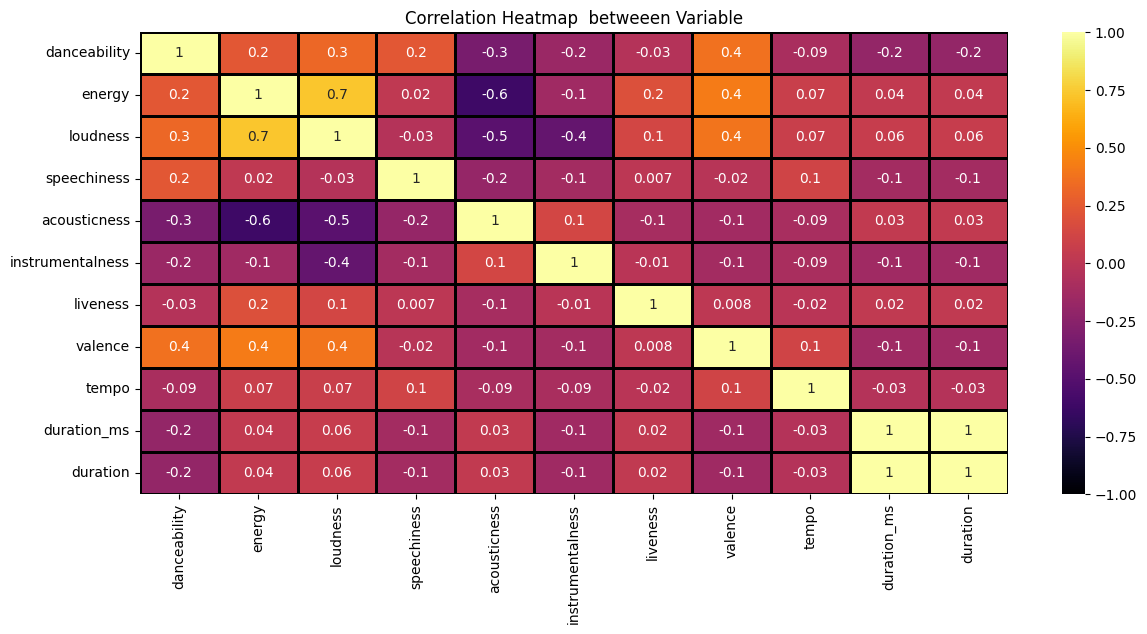

In [21]:
corr_df=tf_df.corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt='.1g',vmin=-1,vmax=1,center=0,cmap='inferno',
                    linewidths=1,linecolor='Black')
heatmap.set_title("Correlation Heatmap  betweeen Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

After running the piece of code, we got our correlation map. On the right side, you can see a scale ranging from -1 to +1. Here -1 denotes the variables that have the least or negative correlation, while the values above 0.0 denote the variables with a positive correlation.

In [22]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
648,113010904,90,Ed Sheeran,"['pop', 'singer-songwriter pop', 'uk pop']"
80,82198627,87,Billie Eilish,"['art pop', 'electropop', 'pop']"
475,77746916,100,Taylor Swift,['pop']
368,76633054,95,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
513,70771462,96,Bad Bunny,"['reggaeton', 'trap latino', 'urbano latino']"
865,66897911,95,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
996,66479125,90,BTS,"['k-pop', 'k-pop boy group', 'pop']"
415,56012413,89,Rihanna,"['barbadian pop', 'pop', 'urban contemporary']"
303,48573523,87,Imagine Dragons,"['modern rock', 'pop', 'rock']"
779,43181492,84,Selena Gomez,"['pop', 'post-teen pop']"


Create a Regression Plot Between Loudness and Energy. Let’s Plot It  in the Form of a Regression Line.
We will use the regplot() function present in the seaborn library to draw the regression plot.

[Text(0.5, 1.0, 'Energy vs Loudness Correlation')]

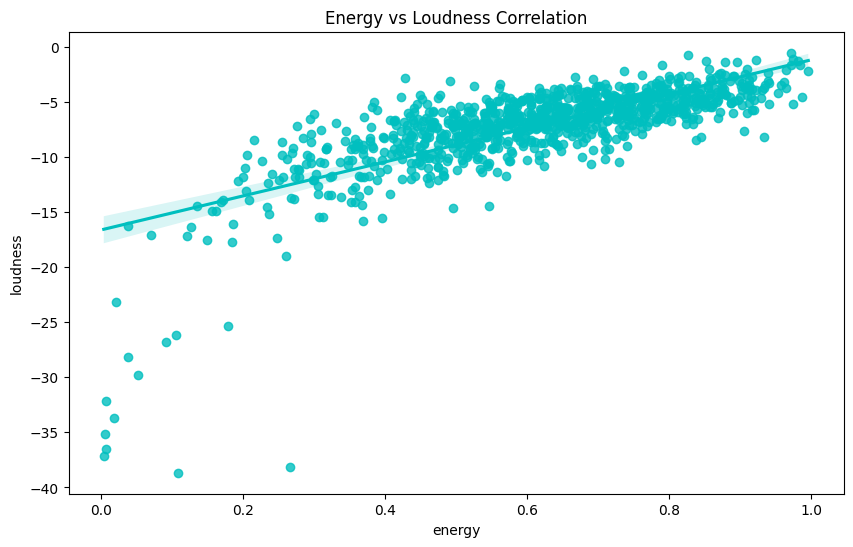

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(data=tf_df,x='energy',y='loudness',
            color='c').set(title='Energy vs Loudness Correlation')

The result is plotted. There is a very high positive correlation between loudness and energy. You can also see that all the data points or the songs are in one direction. If the energy increases, the loudness of the song increases and similarly, if the song's loudness decreases, the energy of the track also decreases.



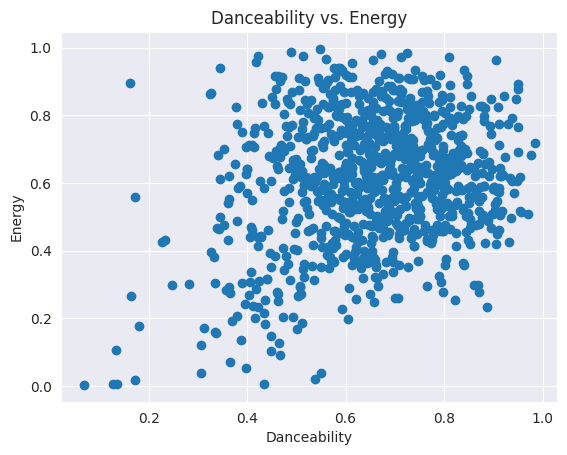

In [36]:
plt.scatter(tf_df['danceability'], tf_df['energy'])
#plt.(tf_df['danceability'], tf_df['energy'])
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs. Energy')
plt.show()

Data Analysis Based on Genres of the Songs

In [25]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

pop                      188
rap                      187
contemporary country      68
modern country pop        66
sad sierreno              65
hip hop                   64
corrido                   62
nueva musica mexicana     61
r&b                       60
urbano latino             60
trap                      57
trap latino               57
sierreno                  50
reggaeton                 45
singer-songwriter pop     41
corridos tumbados         40
country                   39
country road              38
melodic rap               35
pov: indie                33
dtype: int64

In [26]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Ed Sheeran,pop
1,Drake,rap
2,Luke Combs,contemporary country
3,Zach Bryan,modern country pop
4,Junior H,sad sierreno
5,Drake,hip hop
6,Junior H,corrido
7,Christian Nodal,nueva musica mexicana
8,Beyoncé,r&b
9,Bad Bunny,urbano latino


In [27]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'],
                                                 ascending=False)[['track_popularity','
                                                 track_name', 'artist_name',
                                                 'artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Anti-Hero,95,Taylor Swift,pop
1,Creepin' (with The Weeknd & 21 Savage),96,Metro Boomin,rap
2,The Kind of Love We Make,84,Luke Combs,contemporary country
3,Something in the Orange,89,Zach Bryan,modern country pop
4,AMG,94,Natanael Cano,sad sierreno
5,Jimmy Cooks (feat. 21 Savage),90,Drake,hip hop
6,AMG,94,Natanael Cano,corrido
7,AMG,94,Natanael Cano,nueva musica mexicana
8,Kill Bill,94,SZA,r&b
9,Me Porto Bonito,93,Bad Bunny,urbano latino


In [28]:
df = pd.DataFrame(top_songs_by_genre)

[Text(0.5, 1.0, 'Top 5 generes by popularity')]

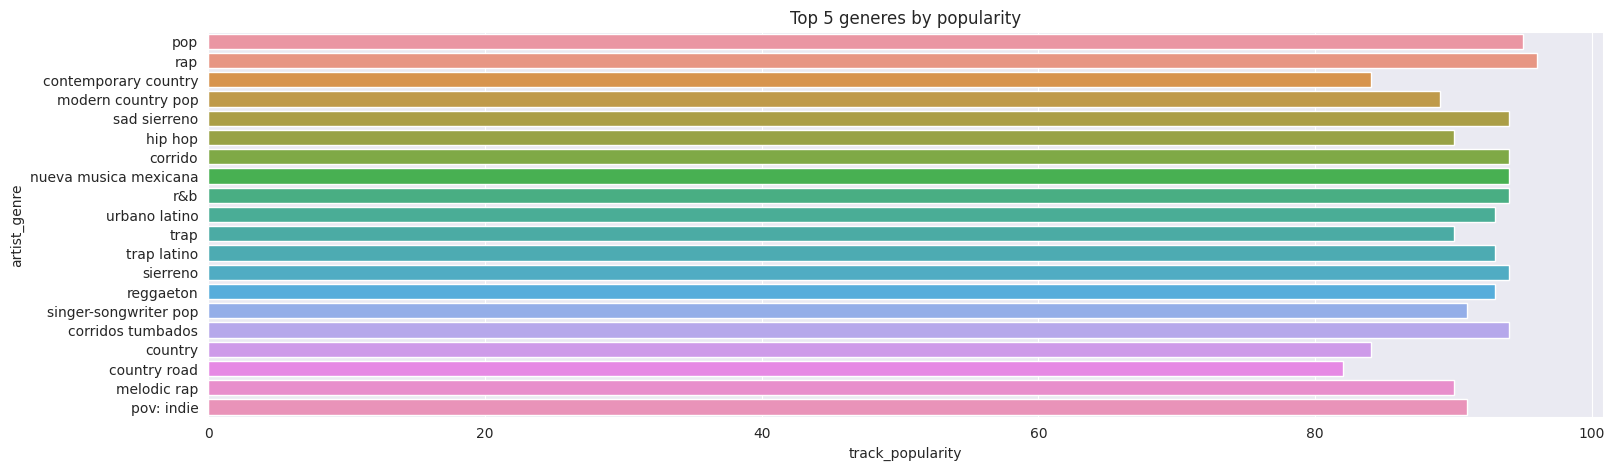

In [29]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(18,5))
#famous=df("track_popularity",ascending=False).head(10)
sns.barplot(y='artist_genre',x='track_popularity',data=df).set(title='Top 5 generes by popularity')

Text(0.5, 1.0, 'Top genres')

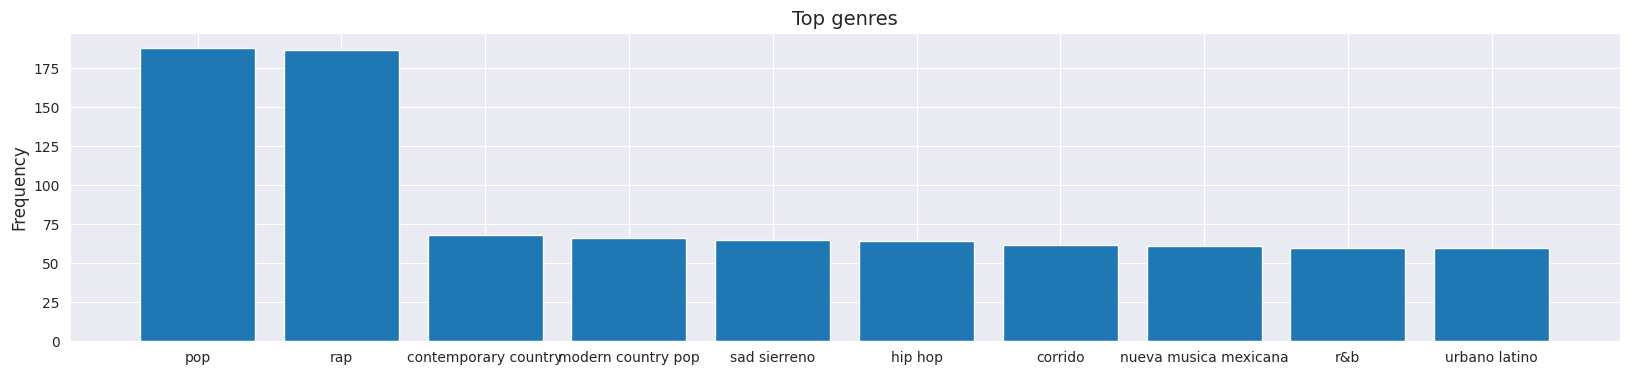

In [30]:
fig, ax = plt.subplots(figsize = (20,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

Find top five genres by Frequency and plot a barplot for the same

Text(0.5, 1.0, 'Top genres')

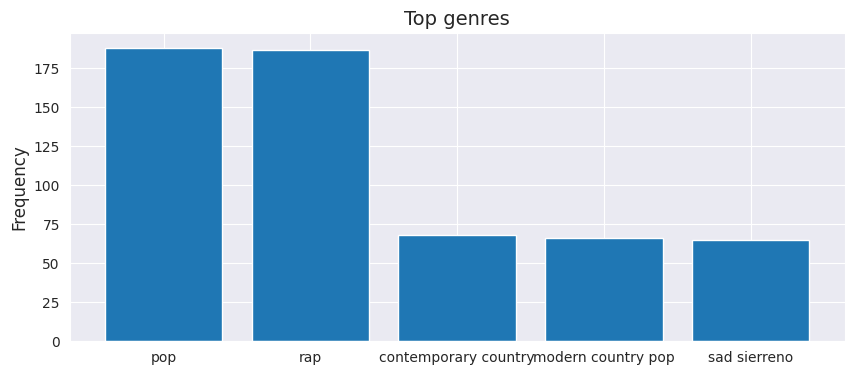

In [31]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:5],
        to_1D(track_df['artist_genres']).value_counts().values[:5])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

Here we got our top 5 genres based on the popularity that is Pop, Rap,contemporary country, Hip-Hop, sad sierreno.

In [32]:
track_df.to_csv('track_df.csv')
tf_df.to_csv('tf_df.csv')
#top_songs_by_genre.to_csv('file3.csv')
#import numpy as np
np.savetxt("top_songs_by_genre.csv",
           top_songs_by_genre,
           delimiter =", ",
           fmt ='% s')
top_10_genres
np.savetxt("top_10_genres.csv",
           top_10_genres,
           delimiter =", ",
           fmt='% s')
by_track_pop.to_csv('track by popu.csv')
by_art_fol.to_csv('by_art_fol.csv')
df.to_csv('df.csv')

Today, businesses hire data analysts to analyze their collected data and use the extracted information to know more about their consumers. We can easily analyze the data and draw useful insights with various Python libraries and functions.

In [33]:
print(top_songs_by_genre)

[{'track_name': 'Anti-Hero', 'track_popularity': 95, 'artist_name': 'Taylor Swift', 'artist_genre': 'pop'}, {'track_name': "Creepin' (with The Weeknd & 21 Savage)", 'track_popularity': 96, 'artist_name': 'Metro Boomin', 'artist_genre': 'rap'}, {'track_name': 'The Kind of Love We Make', 'track_popularity': 84, 'artist_name': 'Luke Combs', 'artist_genre': 'contemporary country'}, {'track_name': 'Something in the Orange', 'track_popularity': 89, 'artist_name': 'Zach Bryan', 'artist_genre': 'modern country pop'}, {'track_name': 'AMG', 'track_popularity': 94, 'artist_name': 'Natanael Cano', 'artist_genre': 'sad sierreno'}, {'track_name': 'Jimmy Cooks (feat. 21 Savage)', 'track_popularity': 90, 'artist_name': 'Drake', 'artist_genre': 'hip hop'}, {'track_name': 'AMG', 'track_popularity': 94, 'artist_name': 'Natanael Cano', 'artist_genre': 'corrido'}, {'track_name': 'AMG', 'track_popularity': 94, 'artist_name': 'Natanael Cano', 'artist_genre': 'nueva musica mexicana'}, {'track_name': 'Kill Bil